In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 4.3MB 55.4MB/s 
     |████████████████████████████████| 501kB 49.3MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 24.38 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [ ]:
movies = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [ ]:
movies.shape

(7254, 27)

In [ ]:
movies.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
img_width = 350
img_height = 350

In [ ]:
X = []

In [ ]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(movies.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + movies['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:23<00:00, 310.07it/s]


In [ ]:
X.shape

(7254, 350, 350, 3)

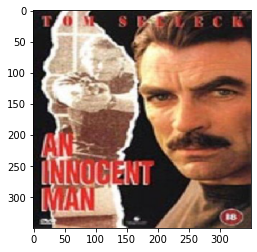

In [ ]:
plt.imshow(X[1005])


In [ ]:
movies['Genre'][1005]

"['Action', 'Crime', 'Drama']"

In [ ]:
y = movies.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [ ]:
X_train , X_test , y_train , y_test =  train_test_split(X,y,random_state = 0,test_size = 0.15)
X_train[0].shape

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 23s 4ms/sample - loss: 0.6957 - accuracy: 0.6491 - val_loss: 2.2126 - val_accuracy: 0.3770
Epoch 2/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.3138 - accuracy: 0.8917 - val_loss: 0.2827 - val_accuracy: 0.9043
Epoch 3/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2628 - accuracy: 0.9067 - val_loss: 0.2508 - val_accuracy: 0.9055
Epoch 4/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2517 - accuracy: 0.9091 - val_loss: 0.2664 - val_accuracy: 0.9010
Epoch 5/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2455 - accuracy: 0.9119 - val_loss: 0.2697 - val_accuracy: 0.9059


In [ ]:
model.evaluate(X_test, y_test)

1089/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.26967246336494705, 0.9058953]

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

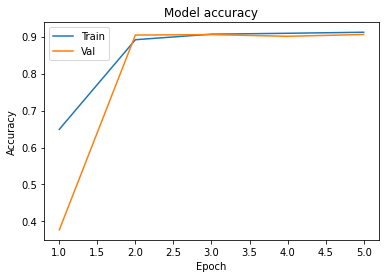

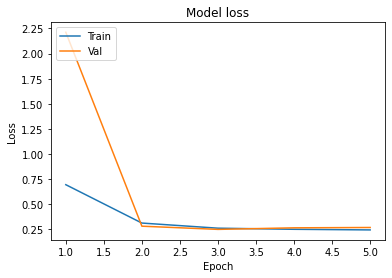

In [ ]:
plot_learningCurve(history, 5)


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Thriller


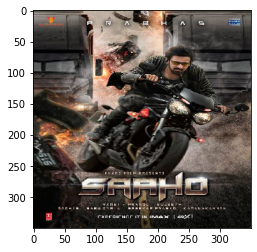

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)
classes = movies.columns[2:]
print(classes)
Y_prob = model.predict(img)
top3 = np.argsort(Y_prob[0])[:-4 :-1]
for i in range(3):
  print(classes[top3[i]])


(0.0, 1.0)

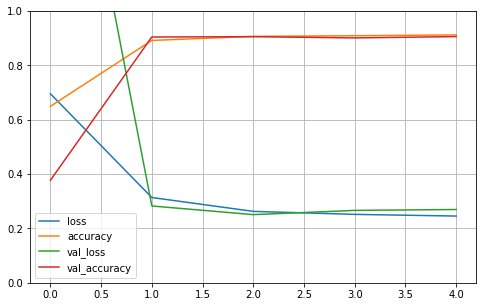

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 1)